In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r"retail_sales_dataset.csv")

In [4]:
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
data.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [10]:
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [11]:
product_sales = data.groupby('Product Category')['Total Amount'].sum().reset_index()

In [12]:
product_sales

,Product Category,Total Amount
0,Beauty,143515
1,Clothing,155580
2,Electronics,156905


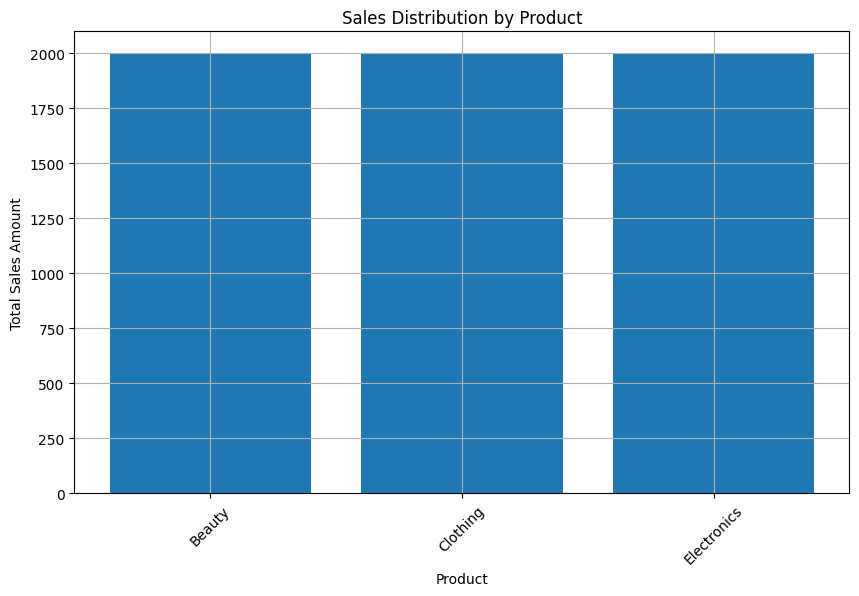

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(data['Product Category'],data['Total Amount'])
plt.xlabel('Product')
plt.ylabel('Total Sales Amount')
plt.title('Sales Distribution by Product')
plt.xticks(rotation=45)
plt.grid(True)

In [14]:
prod_category_sales = data.groupby(['Product Category', 'Age']).sum().unstack()

In [15]:
prod_category_sales

Transaction ID                                             
Age                          18    19    20    21    22    23    24    25   
Product Category                                                            
Beauty                     3093  3382  4400  4043  4962  3821  2809  3015  \
Clothing                   2401  1101  2917  2912  2772  3259  2287  2383   
Electronics                2730  5212  3524  2065  4099  3594  3980  4070   

                              ... Total Amount                                 
Age                 26    27  ...           55    56    57    58    59    60   
Product Category              ...                                              
Beauty            2684  3847  ...         2800  2135  3625  3790  2700   570  \
Clothing          4983  3091  ...         2250  3890  3645  2285  4110  4000   
Electronics       4362  3219  ...         4730  3415  2020  1320  2660  7020   

                                          
Age                 61    62    63    64  
Product Category                          
Beauty            1340  1225   155  2330  
Clothing          2490   615  2470  5555  
Electronics       2900  6280  6625  1240  

[3 rows x 329 columns]